### About Dataset
This dataset simulates the productivity of AI developers over 500 days, capturing the subtle interaction between deep work, distractions, caffeine intake, and code quality. Designed to push the limits of machine learning, this data blends behavioral, physiological, and productivity indicators to allow for advanced predictive modeling, regression, clustering, and time-series analysis.

In [8]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings. simplefilter(action="ignore", category=FutureWarning)

In [9]:
df = pd.read_csv("data/ai_dev_productivity.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
df.head(10)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,0
8,4.06,409,5,6.1,6,2,2.43,7.0,0
9,6.09,567,5,7.3,7,0,2.11,5.1,1


In [12]:
graph = df["distractions"].corr(df["task_success"])
graph

-0.10430255899158983

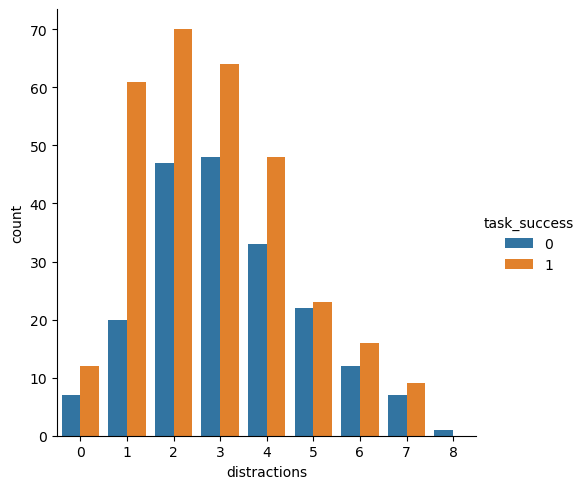

In [13]:
sns.catplot(data=df, x ="distractions" , hue ="task_success", kind = "count");

In [14]:
df_num = df["distractions"].value_counts().reset_index()
df_num["percentages"] = df_num["count"]/500 * 100
df_num

,distractions,count,percentages
0,2,117,23.4
1,3,112,22.4
2,1,81,16.2
3,4,81,16.2
4,5,45,9.0
5,6,28,5.6
6,0,19,3.8
7,7,16,3.2
8,8,1,0.2


### Insights from the plot
 The number of people with no distractions are very few, indicating that in an average workspace, it's hard not to find distractions.
 + 78.2% of developers experience at least 1-4 distractions a day.
 + Less than 4% of AI developers have 0 distractions a day.

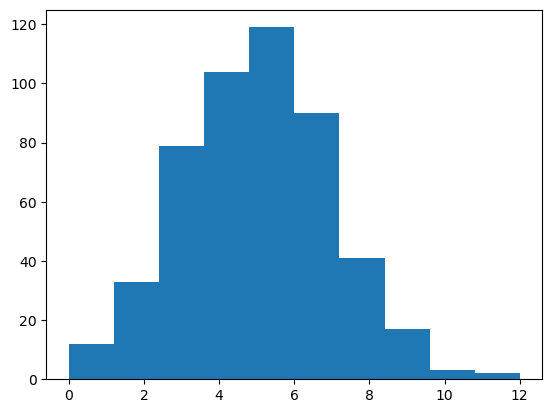

In [16]:
plt.hist(df["hours_coding"]);

In [17]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [18]:
zero_hours_coding = df[df["hours_coding"] == 0]
print( len(zero_hours_coding))

2


####  Insight from the  Histogram Displaying Number of hours coding

+ Developers spend an average of 5 hours coding each day.

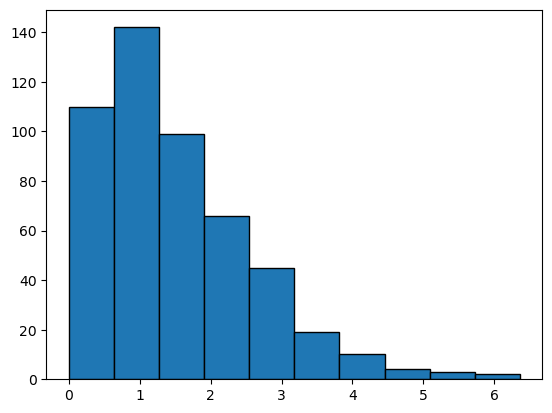

In [44]:
plt.hist(df["ai_usage_hours"], bins=10, edgecolor='black');

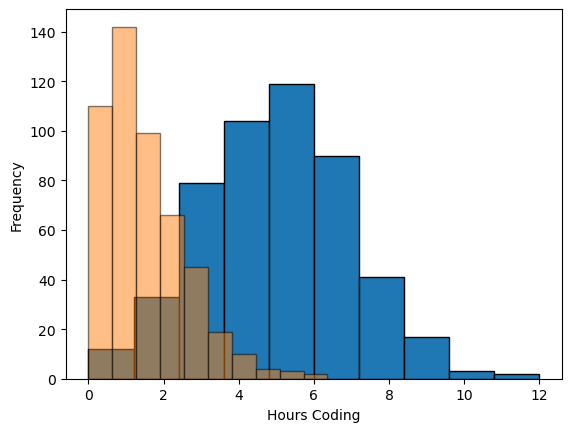

In [21]:
plt.hist(df["hours_coding"], bins=10, edgecolor='black' )
plt.hist(df["ai_usage_hours"], bins=10, edgecolor='black', alpha=0.5)
plt.xlabel("Hours Coding")
plt.ylabel("Frequency");

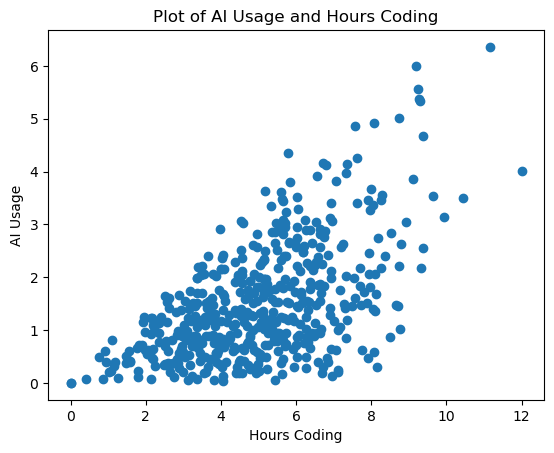

In [22]:
plt.scatter(x=df["hours_coding"], y=df["ai_usage_hours"])
plt.xlabel("Hours Coding")
plt.ylabel("AI Usage")
plt.title("Plot of AI Usage and Hours Coding");

In [23]:
# Rounding up "cognitive_load" column
df["cognitive_load"] = df["cognitive_load"].round()

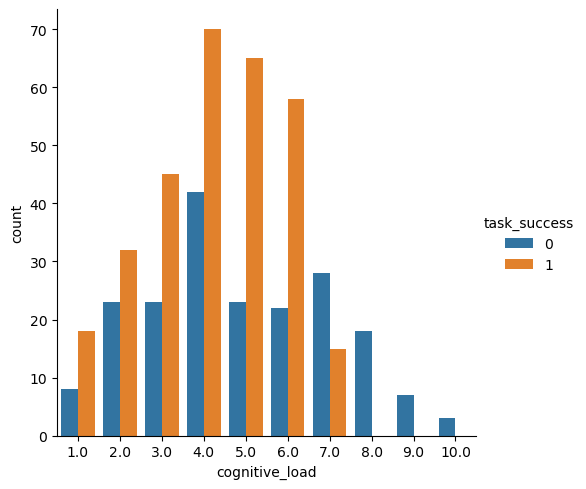

In [24]:
sns.catplot(data=df, x="cognitive_load", hue="task_success", kind="count");